### Each training and test example is assigned to one of the following 10 lables
- 0:T-shirt/top
- 1:Trouser
- 2:Pullover
- 3:Dress
- 4:Coat
- 5:Sandal
- 6:Shirt
- 7:Sneaker
- 8:Bag
- 9:Ankle boot

In [47]:
pip install --upgrade absl-py

Requirement already up-to-date: absl-py in /Users/Qianqian/opt/anaconda3/lib/python3.7/site-packages (0.11.0)
Note: you may need to restart the kernel to use updated packages.


In [48]:
#data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# TensorFlow and tf.keras
import tensorflow as tf


In [49]:
train = pd.read_csv("dataset/fashion-mnist_train.csv")
test = pd.read_csv("dataset/fashion-mnist_test.csv")

In [50]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#Split train data into image data and label
train_data = np.array(train, dtype="float32")
#Scale pixels from 0-255 to 0-1
image_train = train_data[:,1:]/255
label_train = train_data[:,0]

In [53]:
#Split test data into image data and label
test_data = np.array(test, dtype="float32")
#Scale pixels from 0-255 to 0-1
image_test = test_data[:,1:]/255
label_test = test_data[:,0]

In [54]:
image_train.shape

(60000, 784)

In [55]:
label_train.shape

(60000,)

In [56]:
image_test.shape

(10000, 784)

In [57]:
label_test.shape

(10000,)

In [58]:
#Slit train data into validation and train data, 
#use train_test_split from scikit learn library
image_train, image_validate, label_train, label_validate = train_test_split(image_train, label_train, test_size = 0.2, random_state = 12345)


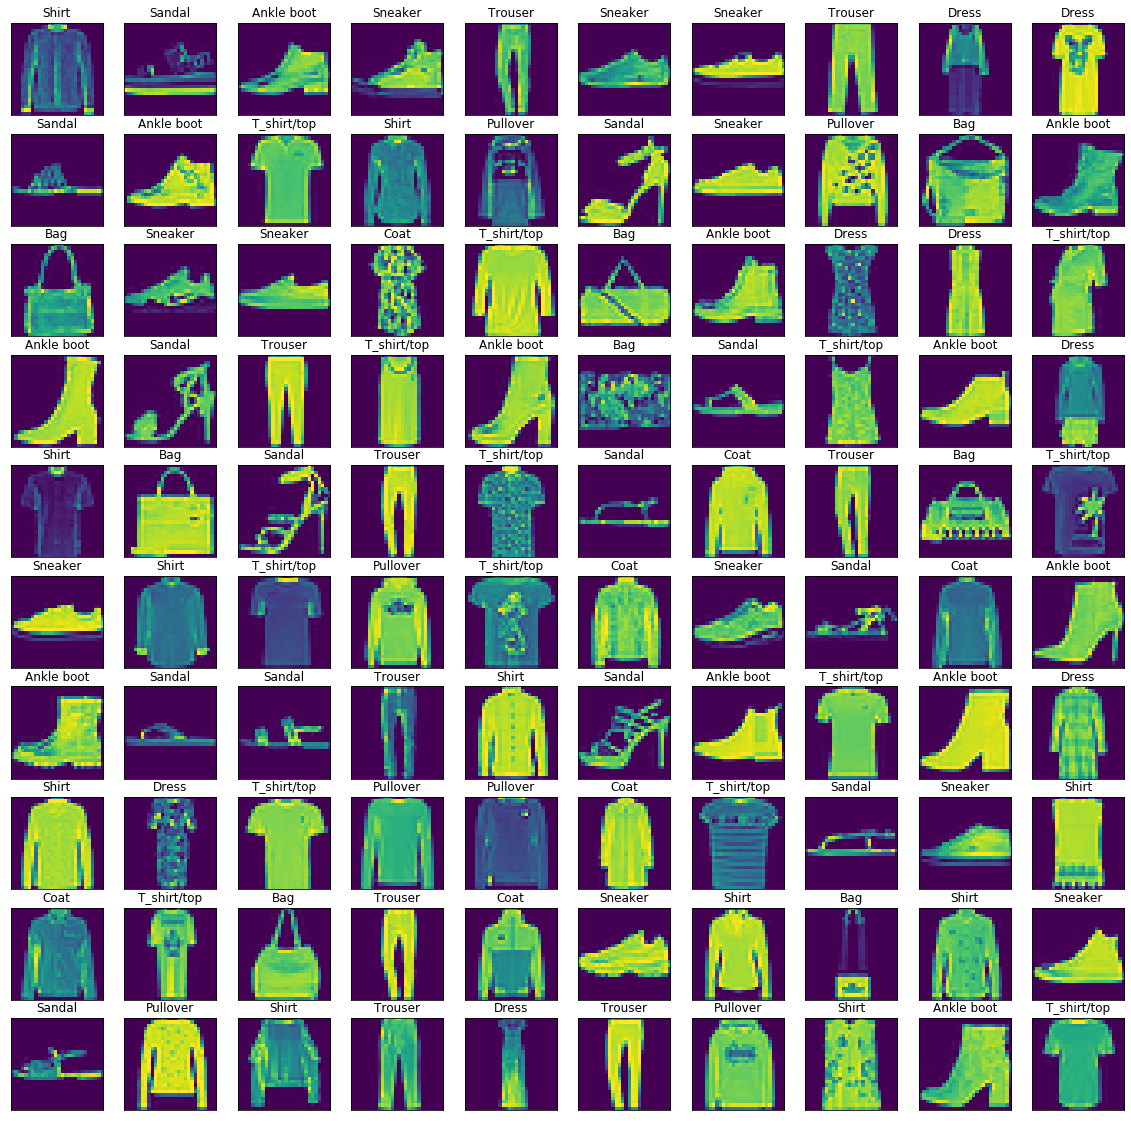

In [59]:
%matplotlib inline
#Visualize some samples
label_names = ["T_shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_train[i].reshape((28,28)))
    label_index = int(label_train[i])
    plt.title(label_names[label_index])
plt.show()

## Convolutional Neural Networks (CNN)

In [60]:
#Define the model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [43]:
#Reshape image train array and image test array
image_train = image_train.reshape(image_train.shape[0],*(28,28,1))
image_test = image_test.reshape(image_test.shape[0],*(28,28,1))
image_validate = image_validate.reshape(image_validate.shape[0],*(28,28,1))

In [44]:
#Compile the model
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
#Train the model
history = cnn_model.fit(image_train, label_train, batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(image_validate,label_validate),)

Train on 48000 samples, validate on 12000 samples
Epoch 1/75
48000/48000 [==============================] - 10s 199us/sample - loss: 1.8105 - acc: 0.4547 - val_loss: 1.2060 - val_acc: 0.6160
Epoch 2/75
48000/48000 [==============================] - 9s 180us/sample - loss: 0.9445 - acc: 0.6903 - val_loss: 0.7352 - val_acc: 0.7448
Epoch 3/75
48000/48000 [==============================] - 9s 180us/sample - loss: 0.6731 - acc: 0.7641 - val_loss: 0.6062 - val_acc: 0.7818
Epoch 4/75
48000/48000 [==============================] - 9s 182us/sample - loss: 0.5849 - acc: 0.7914 - val_loss: 0.5483 - val_acc: 0.8034
Epoch 5/75
48000/48000 [==============================] - 9s 186us/sample - loss: 0.5326 - acc: 0.8116 - val_loss: 0.5080 - val_acc: 0.8172
Epoch 6/75
48000/48000 [==============================] - 10s 200us/sample - loss: 0.4992 - acc: 0.8245 - val_loss: 0.4814 - val_acc: 0.8275
Epoch 7/75
48000/48000 [==============================] - 11s 233us/sample - loss: 0.4764 - acc: 0.8332 - va

Text(0.5, 1.0, 'Train - Accuracy')

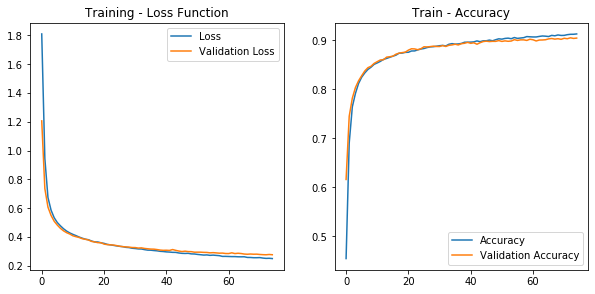

In [23]:
#Plot Training Accuracy vs Loss
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [24]:
test_loss, test_acc = cnn_model.evaluate(image_test, label_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.2681 - acc: 0.9085

Test accuracy: 0.9085


In [46]:
cnn_model.save("cnn_model")